In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge , RidgeCV , Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
hsd = fetch_california_housing()

In [2]:
hsd_df = pd.DataFrame(hsd.data,columns=hsd.feature_names)
hsd_df['Price'] = hsd.target
hsd_df = hsd_df.sample(frac = 0.2 , random_state = 200)
hsd_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
20523,3.9000,22.0,5.707838,1.023753,1088.0,2.584323,38.51,-121.55,1.469
17655,4.7069,26.0,5.135693,0.952802,1007.0,2.970501,37.25,-121.89,2.348
11334,6.6355,19.0,7.210909,1.029091,1098.0,3.992727,33.75,-117.95,2.761
636,3.3431,10.0,4.595876,1.239175,877.0,1.808247,37.72,-122.16,1.375
14954,4.3750,25.0,6.566667,1.050794,1905.0,3.023810,32.75,-116.98,2.140


<Axes: >

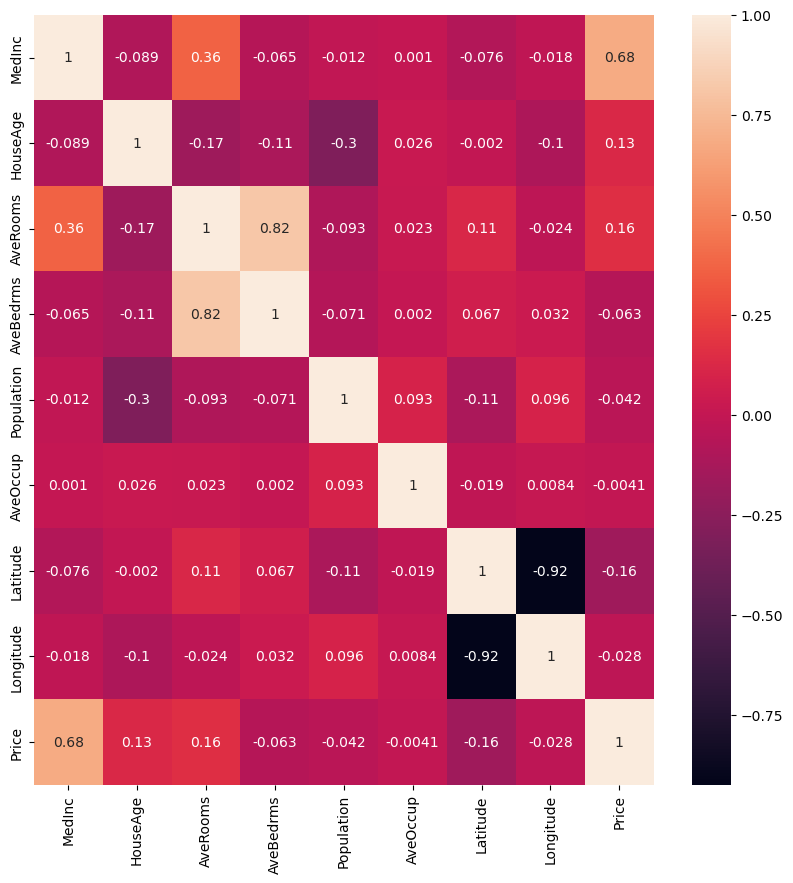

In [3]:
plt.figure(figsize=(10,10))
sns.heatmap(hsd_df.corr(),annot=True)

In [10]:
features = hsd_df.columns[0:9]
target = hsd_df.columns[-1]
X = hsd_df[features]
y = hsd_df[target]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("The Dimension of X_train is {}".format(X_train.shape))

The Dimension of X_train is (2889, 9)


In [11]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 0.8238197 , -1.00095376, -0.12709102, ...,  0.83130576,
        -1.1463819 , -0.25555876],
       [-1.23640127,  0.18630041, -0.22080127, ...,  1.08732058,
        -1.39560249, -1.10084378],
       [-1.04913202,  0.81950264, -0.2069871 , ...,  0.51943318,
        -0.09467104, -1.35056757],
       ...,
       [-0.02270365,  1.37355459, -0.71953612, ..., -1.16560976,
         1.22121364, -0.07448755],
       [-0.1941035 , -0.28860126, -0.78388138, ...,  0.88716354,
        -1.35572719,  0.66953489],
       [-1.27908268,  0.9778032 , -0.57166975, ...,  0.32858577,
        -0.03984251, -1.34713494]])

In [13]:
lr=LinearRegression()

In [16]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

1.0

In [15]:
lr.score(X_test,y_test)

1.0

In [40]:
ridgee=Ridge(alpha=10)
lassor=Lasso(alpha=10)


In [41]:
ridgee.fit(X_train,y_train)
ridgee.score(X_train,y_train)


0.9999716156074282

In [42]:
ridgee.score(X_test,y_test)

0.9999716267712209

In [34]:
lassor.fit(X_train,y_train)
1+lassor.score(X_train,y_train)

1.0

In [35]:
1+lassor.score(X_test,y_test)

0.9990488177350596

AttributeError: Text.set() got an unexpected keyword argument 'rotaion'

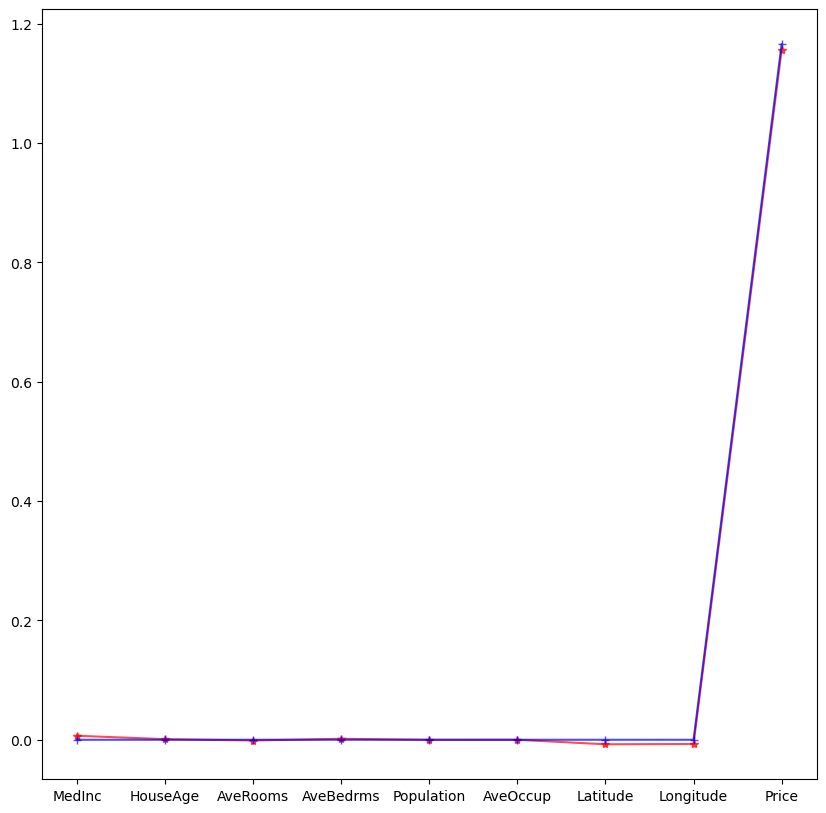

In [43]:
plt.figure(figsize=(10,10))
plt.plot(features,ridgee.coef_,alpha=0.7,marker="*",color='red',label="ridge")
plt.plot(features,lr.coef_,alpha=0.7,marker="+",color='blue',label="linear regression")
plt.xticks(rotaion=90)
plt.legend()
plt.show()

In [44]:
from sklearn.linear_model import LassoCV

In [47]:
lass=LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10],random_state=0)
lass.fit(X_train,y_train)
lass.score(X_test,y_test)

0.9999999926286544

In [49]:
lass.score(X_train,y_train)

0.9999999926356592

AttributeError: Text.set() got an unexpected keyword argument 'rotaion'

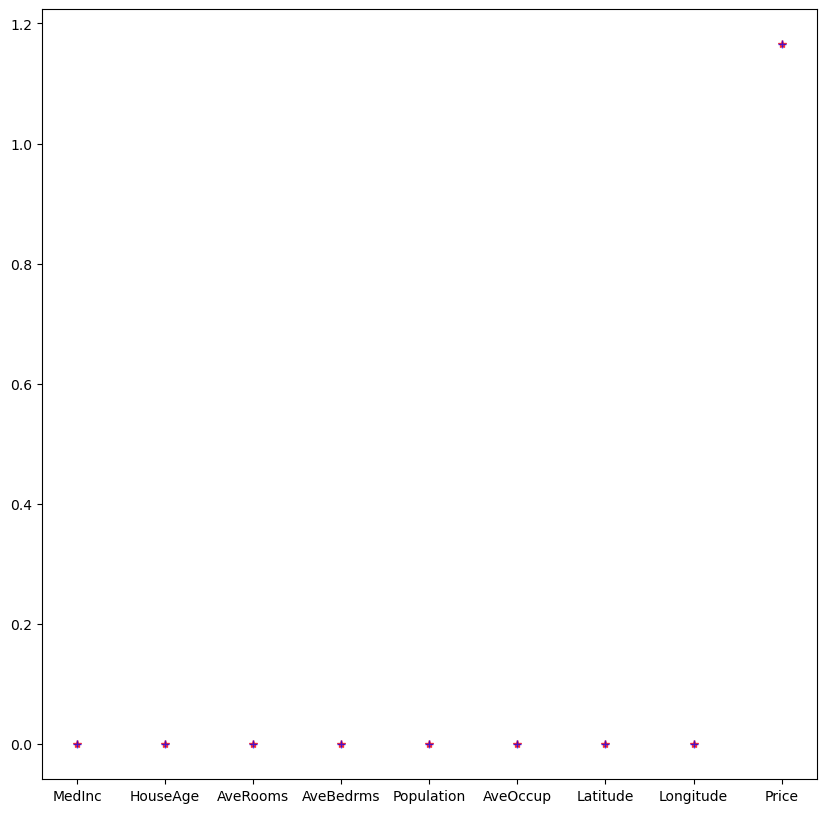

In [56]:
plt.figure(figsize=(10,10))
plt.plot(features,lass.coef_,alpha=0.7,linestyle='none',marker="*",color='red',label="lass")
plt.plot(features,lr.coef_,alpha=0.7,marker="+",linestyle='none',color='blue',label="linear regression")
plt.xticks(rotaion=90)
plt.legend()
plt.show()